In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('stroke-prediction-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [376]:
#Inspecting Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5119 non-null   int64  
 1   gender             5119 non-null   object 
 2   age                5119 non-null   float64
 3   hypertension       5119 non-null   int64  
 4   heart_disease      5119 non-null   int64  
 5   ever_married       5119 non-null   object 
 6   work_type          5119 non-null   object 
 7   Residence_type     5119 non-null   object 
 8   avg_glucose_level  5119 non-null   float64
 9   bmi                4917 non-null   float64
 10  smoking_status     5119 non-null   object 
 11  stroke             5119 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 480.0+ KB


In [377]:
#Identifying the dimension of Dataset
df.shape

(5119, 12)

In [378]:
#Describing the Dataset
round(df.describe(include='all',),2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5119.00,5119,5119.00,5119.0,5119.00,5119,5119,5119,5119.00,4917.00,5119,5119.00
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,3000,NaN,NaN,NaN,3358,2927,2601,NaN,NaN,1896,NaN
mean,36518.70,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.13,28.90,NaN,0.05
std,21159.35,NaN,22.63,0.3,0.23,NaN,NaN,NaN,45.25,7.86,NaN,0.22
min,67.00,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,17742.50,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.27,23.50,NaN,0.00
50%,36942.00,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,54669.00,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [379]:
#Dropping ID column as a part of dimensionality reduction
df.drop('id', axis = 1, inplace = True)

In [380]:
#Dropping duplicate values in the Dataset
df.drop_duplicates(keep = 'first', inplace=True)

In [381]:
#Identifying the missing values columns and their count
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [382]:
#Calcutating the percentage of missing values in the Dataset

percentage_missing = (df.isna().sum() / len(df)) * 100
percentage_missing

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [383]:
#Filling the missing “bmi” values with the median of “bmi” column.
median = df['bmi'].median(skipna=True)
df.fillna({'bmi':median}, inplace=True)

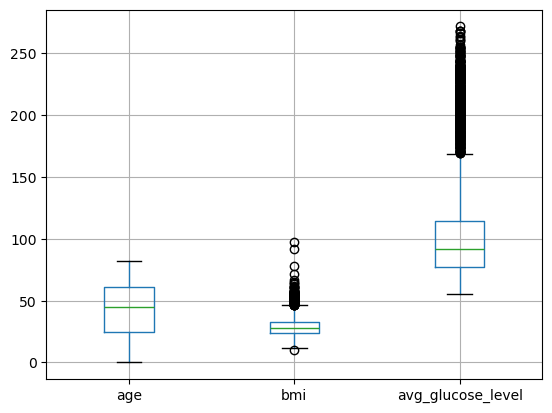

In [384]:
#Analysis and transformation of Outliers
#The features "Age", "avg_glucose_level" and "bmi" are prone to outliers as they are numerical values,
# whereas other features are either Binary or Nominal

df.boxplot(column = ['age', 'bmi','avg_glucose_level'])
plt.show()

In [385]:
#Transform “bmi” column using loge (X + 1) formula to make the “bmi” values follow the normal distribution. 

df.loc[:,'bmi'] = np.log(df['bmi']+1)
df.loc[:,'avg_glucose_level'] = np.log(df['avg_glucose_level']+1)


In [386]:
#Creating array of numerical and categorical features
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

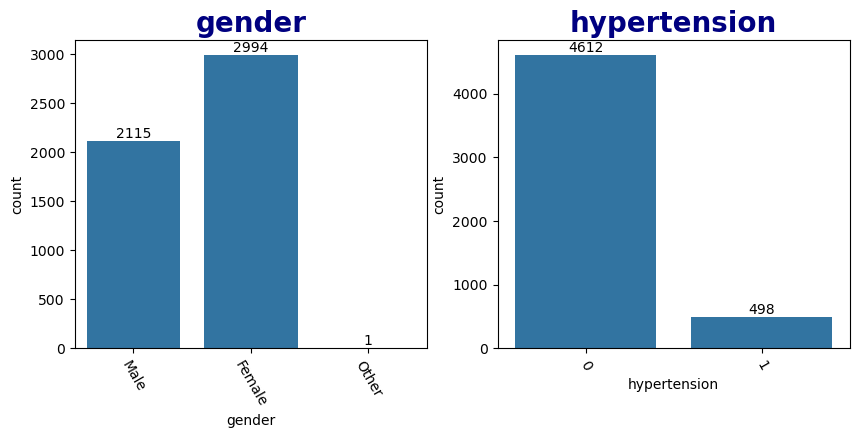

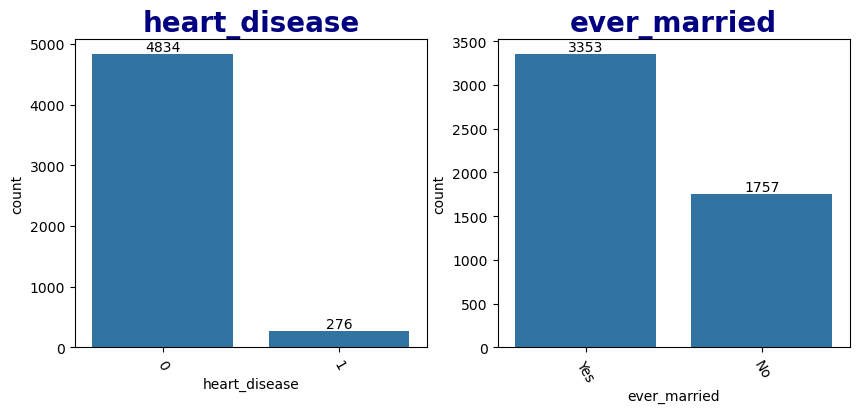

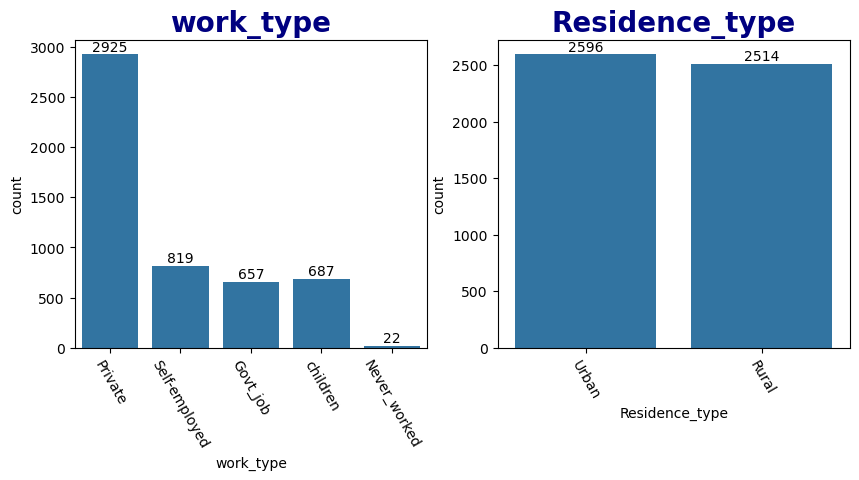

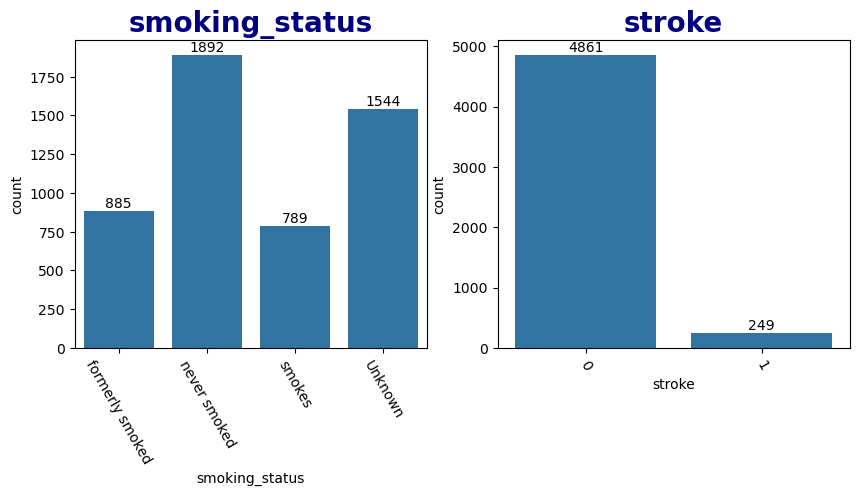

In [387]:
i=0
while i<8 :
    
    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1

    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

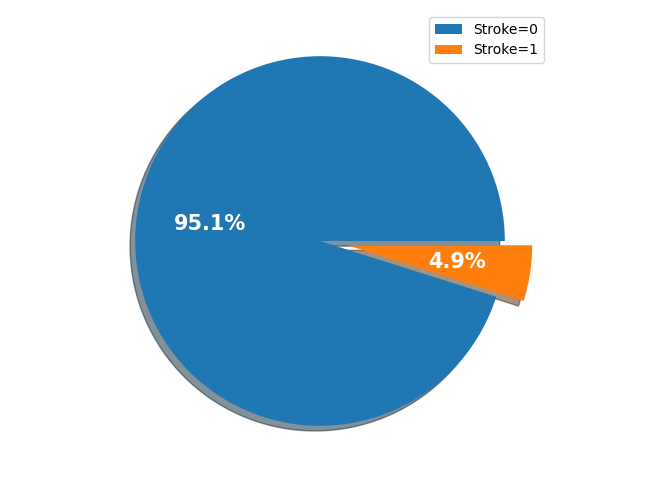

In [388]:
x = df['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

In [389]:
#Converting the categorical variables into numerical format using “Label encoder”.
label_encoder = LabelEncoder()

df[df.select_dtypes(include = ['object']).columns] = df.select_dtypes(include = ['object']).apply(lambda x: label_encoder.fit_transform(x))

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,5.436731,3.627004,1,1
1,0,61.0,0,0,1,3,0,5.314240,3.370738,2,1
2,1,80.0,0,1,1,2,0,4.672081,3.511545,2,1
3,0,49.0,0,0,1,2,1,5.148831,3.566712,3,1
4,0,79.0,1,0,1,3,0,5.165471,3.218876,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,4.439706,3.370738,2,0
5106,0,81.0,0,0,1,3,1,4.837868,3.713572,2,0
5107,0,35.0,0,0,1,3,0,4.430698,3.453157,2,0
5108,1,51.0,0,0,1,2,0,5.119729,3.280911,1,0


Normalisation

In [391]:
#Segregating features (X) and target variable (Y)

X_temp = df.drop(columns='stroke')
y= df.stroke

In [392]:
#Performing featuer scaling using MinMaxScaler

scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.207143,0.526692,0.097456,0.054012,0.656164,0.541928,0.508023,0.364100,0.434048,0.458969
std,0.246522,0.276033,0.296607,0.226063,0.475034,0.272573,0.499985,0.226889,0.115642,0.357178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.500000,0.000000,0.210213,0.362855,0.000000
50%,0.000000,0.548340,0.000000,0.000000,1.000000,0.500000,1.000000,0.318698,0.436666,0.666667
75%,0.500000,0.743652,0.000000,0.000000,1.000000,0.750000,1.000000,0.454276,0.505781,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Modeling

In [394]:
#Splitting Dataset for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [395]:
#
tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9491392801251957
F1 Score: 0.4869530309112806


In [396]:
#
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[1213    0]
 [  65    0]]


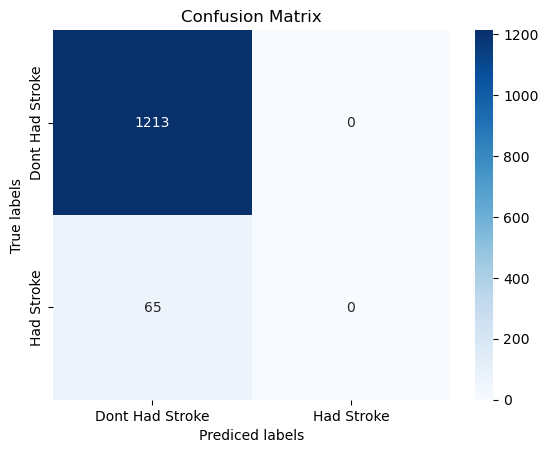

In [397]:
#

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
ax = sns.heatmap(cm, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Prediced labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
plt.show()

In [428]:
#
print("Classification Report: \n", classification_report(y_test, y_pred, zero_division=0))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278

